# TWITTER SENTIMENT ANALYSIS
# BY : M.sowmia
## IITM-MA19M020

### AIM:
Hte speech is so common in today's world especially in the world of social network.Facebook's abd twitter are working in actively combating hatespeech on these networking websites.In spite of these reasons, NLP research on hate speech has been very limited, primarily due to the lack of a general definition of hate speech, an analysis of its demographic influences, and an investigation of the most effective features.In our project ,we will be trying to analyse a set of tweets and classify them as sexist/racist or not racist/not-sexist.The label is 1 if the tweet is either sexist/racist and 0 otherwise.This is a simple single-label classification problem.We will try different methods to model our problem and arrive at the best possible model in terms of F1 -score

### EVALUATION METRIC:
$$F-SCORE=\frac{2(\text{recall})(\text{precision})}{\text{recall+precision}}$$<br><br>
Note that the formula for recall is given by:
$$\text{recall}=\frac{T.P}{T.P+F.N}$$<br><br>
$$\text{precision}=\frac{T.P}{T.P+F.P}$$<br><br>
Note that the F-score is the harmonic mean of precision and recall,meaning the score will be good only if both recall and precision are somewhat considerable.This is a desirable thing,because there is trade-off between precision and recall and we want both scores to be similar.So ,we try to improve upon the F-score

In [1]:
import re
import nltk
import numpy as np
import string
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option("display.max_colwidth", 200) 

In [2]:
tweet_train=pd.read_csv('train_tweets.csv')
tweet_test=pd.read_csv('test_tweets.csv')

## DATA PREPROCESSING:


Lets look at some of the sexist or racist datasets then look at some non-racist/non-sexist ones just to get an idea

In [3]:
tweet_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [4]:
tweet_train[tweet_train['label']==1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia


In [5]:
print("train set dimension:",tweet_train.shape)
print("test-set dimension:",tweet_test.shape)

train set dimension: (31962, 3)
test-set dimension: (17197, 2)


Lets us see the distribution of racist/sexist tweets in the dataset

In [6]:
k=tweet_train["label"].value_counts()
print(" hate-tweets:\n",k)
print("%hate tweets=",k[1]*100/len(tweet_train),"%")

 hate-tweets:
 0    29720
1     2242
Name: label, dtype: int64
%hate tweets= 7.014579813528565 %


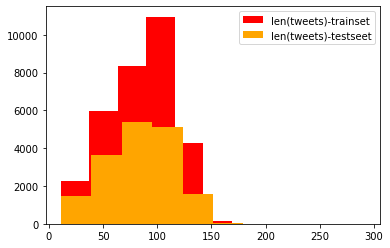

In [7]:
train_len_tweets=tweet_train["tweet"].str.len()
test_len_tweets=tweet_test["tweet"].str.len()
plt.hist(train_len_tweets,bins=10,color='red',label="len(tweets)-trainset")
plt.hist(test_len_tweets,bins=10,color="orange",label="len(tweets)-testseet")
plt.legend()
plt.show()

### DATA CLEANING:

In [3]:
df=tweet_train.append(tweet_test,ignore_index=True)


C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [4]:
df.shape

(49159, 3)

### STEP:1- FN FOR REMOVING PATTERNS IN THE TWEET

In [5]:
# pattern-common set of words which might indicate hate comments
# tweet -input tweet where we search for patterns
def pattern_remover(tweet,pattern):
    r = re.findall(pattern,tweet)
    for i in r:
        #removing all patterns
        tweet =re.sub(i,'',tweet)
    return tweet
        

### STEP:2- FN FOR REMOVING TWITTER HANDLES,PUNCTUATIONS,SPL CHARS and VERY SHORT WORDS

In [6]:
def junk_remover(dataset):
    dataset['neat-tweet'] = np.vectorize(pattern_remover)(dataset['tweet'], "@[\w]*")
    #reomving all other characters excpet alphabets and hashtags
    dataset['neat-tweet'] = dataset['neat-tweet'].str.replace("[^a-zA-Z#]", " ") 
    dataset['neat-tweet'] = dataset['neat-tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
junk_remover(df)
    

In [7]:
df["neat-tweet"][:10]

0                                                when father dysfunctional selfish drags kids into dysfunction #run
1                                     thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2                                                                                               bihday your majesty
3                                                                                        #model love take with time
4                                                                                    factsguide society #motivation
5                                huge fare talking before they leave chaos disputes when they there #allshowandnogo
6                                                                                            camping tomorrow danny
7    next school year year exams think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8                                                  love land #allin #cav

### TEXT NORMALISATION AND TOKENISATION:
Before we begin our analysis ,let us normalise our tweets by first tokenising them.Tokenising means splitting the tweets into words.Once we split,we perform stemming on these workds and put them back together

In [8]:
from nltk.stem.porter import*
def normalise_stem(dataset):
    tweet_token=df["neat-tweet"].apply(lambda x:x.split())
    tweet_token.head(5)
    stemming = PorterStemmer()
    tweet_token = tweet_token.apply(lambda x: [stemming.stem(i) for i in x])
    #put them back together
    for i in range(len(tweet_token)):
        tweet_token[i] = ' '.join(tweet_token[i])    
    df['neat-tweet'] = tweet_token
normalise_stem(df)
df.head()

,id,label,tweet,neat-tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


### EXPLORATORY DATA ANALYSIS:
#### Analysing the most frequent words in tweets:

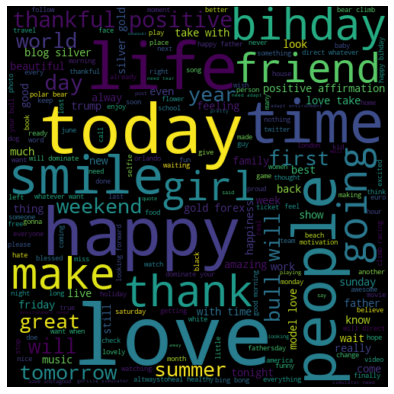

In [10]:
from wordcloud import WordCloud 
all_words = ' '.join([text for text in df['neat-tweet']])
wordcloud = WordCloud(width=500, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

Great!! so we got to see some words from the collection of tweets in the dataset.The larger the size of the tweet in the wordclod,the greater the frequency of them.Now let us have a look at the wordscloud for those tweets that are labelled as sexist/racist (label=1) and compare with the wordcloud of the non-racist/sexist tweets.

#### Analysing the most-frequent words in non-racist/sexist tweets:

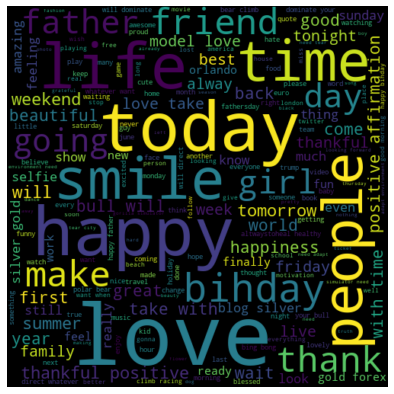

In [11]:
all_words = ' '.join([text for text in df['neat-tweet'][df['label']==0]])
wordcloud = WordCloud(width=500, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

Great!! As expected ,the good tweets has mostly all lovey dovey words.Now let us have a look at the words in tweets labelled- 1.We surely don't expect nice words!!

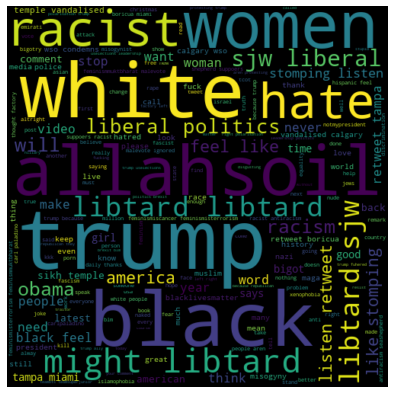

In [12]:
all_words = ' '.join([text for text in df['neat-tweet'][df['label']==1]])
wordcloud = WordCloud(width=500, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

Ok!!As expected,we see that most words in the hate-tweets are of bad-flavour and negative in some sense.To have a deeper look,let us see the distribution of good and bad/hate hash-tags in the data-set.Hash-tags gives us information about tweets that were trending during a particular time.It definately pays to look into them to get an idea.

### HASH-TAGS-GOOD/HATE SPEECHES:

In [13]:
#function collects hashtags in a collection of tweets and returns only them
def collect_hashes(tweets):
    hashes=[]
    for i in tweets:
        hash_tags = re.findall(r"#(\w+)", i)
        hashes.append(hash_tags)  
    return hashes
def good_bad_hashes(dataset):
    good_hashes = collect_hashes(dataset["neat-tweet"][dataset["label"]==0])
    bad_hashes  = collect_hashes(dataset["neat-tweet"][dataset["label"]==1])
    good_hashes = sum(good_hashes,[])
    bad_hashes  = sum(bad_hashes,[])
    return good_hashes,bad_hashes
good_hashes,bad_hashes= good_bad_hashes(df)

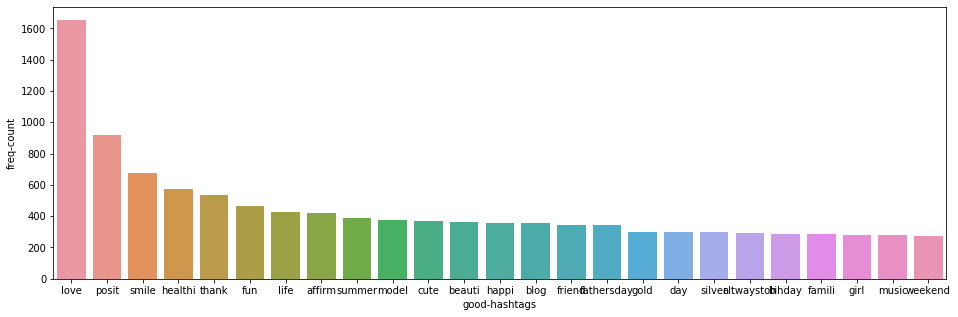

In [14]:
freq = nltk.FreqDist(good_hashes) 
#creating a dictionary of good-hashes with their frequency count
good_freq = pd.DataFrame({'good-hashtags': list(freq.keys()), 'freq-count': list(freq.values())}) 
# selecting top 25 most frequent hashtags   
good_freq_top = good_freq.nlargest(columns="freq-count", n = 25) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=good_freq_top, x= "good-hashtags", y = "freq-count") 
ax.set(ylabel = 'freq-count')
plt.show()

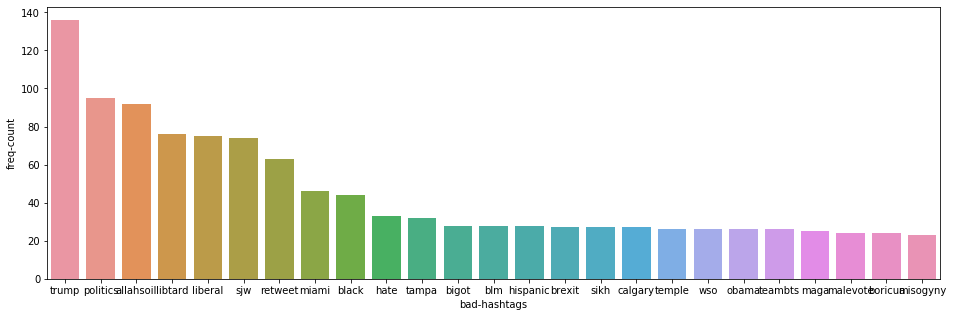

In [18]:
freq = nltk.FreqDist(bad_hashes) 
#creating a dictionary of good-hashes with their frequency count
bad_freq = pd.DataFrame({'bad-hashtags': list(freq.keys()), 'freq-count': list(freq.values())}) 
# selecting top 25 most frequent hashtags   
bad_freq_top = bad_freq.nlargest(columns="freq-count", n = 25) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=bad_freq_top, x= "bad-hashtags", y = "freq-count") 
ax.set(ylabel = 'freq-count')
plt.show()

### CONSTRUCTING FEATURES:
We look into 3 different techniques of finding features of the tweets that might helpus analyse hate-speeches in them
- Bag-of-Words


### BAG-OF-WORDS FEATURE:
The technique is simple.We extract the unique words from the tweet.Form a dictionary of them .Lets say the dictionary constains n words.Then for each tweet,we create a bag-of-words matrix which is mxn matrix.The matrix's i-th row conatins the frequency of the words in the i-th tweet.Then this matrix can be appended to our data-set and be used as features in itself

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
def bag_of_words(dataset):
    bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=800, stop_words='english') 
    bow = bow_vectorizer.fit_transform(dataset['neat-tweet']) 
    return bow
df_bow=bag_of_words(df)
df_bow.shape

(49159, 800)

### TF-IDF FEATURE:
In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus(collection of tweets). It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.Unlike bag of words which considers one- tweet at a time and counts frequency in a single tweet,TF-IDF collects all the words in the collection of tweets and puts "weights" on them according to their frequency of occurance in the entire collection of tweets.So at the end,we will be having a collection of words with their respective weights.

In [23]:
def tf_idf(dataset):
    tf_idf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=800, stop_words='english') 
    tfidf = tf_idf_vectorizer.fit_transform(dataset['neat-tweet'])
    return tfidf
df_tfidf=tf_idf(df)
df_tfidf.shape

(49159, 800)

### WORD TO VECTOR EMBEDDINGS:
What are vector embeddings of words?Loosely speaking ,they are vector representation of words (in our case -words of the tweets).Our objective is to have words with similar context occupy close spatial positions. Mathematically, the cosine of the angle between such vectors should be close to 1, i.e. angle close to 0.As opposed to one-hot encodings or tf-idf or BOW,where the words are independent of each other,in WTV embeddings,we try to put some measure of "closeness" of words into the dataset.OK!! So how do we go about doing this??<br><br>
Turns out, scikit has inbuilt library for this.However it pays to get some insight about the technique.Word2Vec is not a single algorithm but a combination of two techniques – CBOW (Continuous bag of words) and Skip-gram model.
![CBOW](Untitled1.png)
In **CBOW model**,<br>
**INPUT:**  Is a one hot encoded vector of size V. <br>
**HIDDEN-LAYER:** Contains N neurons<br>
**OUTPUT:**  Is a V-length vector with the elements being the softmax values.(probability of a word belonging to a certain taget -word)
Internally,the Network calculates the vector representation of each word,in the process of training the neural network model.Note:the hidden layer has no activations,it just computes the weighted average of the input words and propogates them to the next layer.The third layer is a sigmoid as already said (softmax-regression functions).We can also input words from different contexts(different tweets in th input layer).In such cases ,we take an average over all these C context word inputs.
![CBOW-MULTIPLE CONTEXT](Untitled2.png)
In **SKIP-GRAM model**<br>
**INPUT:**  the target word -onehot encoded of length V 
**HIDDEN-LAYER:** Calculates something
**OUTPUT:** Outputs the probability that a particular word belongs to a particular context for each possible contexts for each word.I f there are C possible contexts and V words,then output would be a CxV matrix of probabilities.
![SKIP-GRAM](Untitled3.png)

In [26]:
import gensim
def W2V(dataset):
    tweet_token = dataset['neat-tweet'].apply(lambda x: x.split())
     # size=desired no. of features/independent variables; # window = context window size
     #sg= 1 for skip-gram model ;negative =# for negative sampling; # workers=no.of cores
    model_w2v = gensim.models.Word2Vec(tweet_token,size=200,window=5, min_count=2,sg = 1, hs = 0,negative = 10, workers= 2,seed = 34) 
    model_w2v.train(tweet_token, total_examples= len(dataset['neat-tweet']), epochs=20)
    return model_w2v
my_w2vmodel=W2V(df)


In [27]:
#size=no of features/independent variables
def word2vec(tweet_token,size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for i in tweet_token:
        try:
            vec += my_w2vmodel[i].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary   
             continue
    if count != 0:
        vec /= count
    return vec 

def wordtovector(dataset):
    tweet_token = dataset['neat-tweet'].apply(lambda x: x.split())
    wordvec_arrays = np.zeros((len(tweet_token), 200)) 
    for i in range(len(tweet_token)):
        wordvec_arrays[i,:] = word2vec(tweet_token[i], 200)
    df_w2vec = pd.DataFrame(wordvec_arrays) 
    return df_w2vec

df_w2vec=wordtovector(df)   
df_w2vec.shape

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


(49159, 200)

### DOC TO VECTOR EMBEDDING:
While the word vectors represent the concept of a word, the document vector intends to represent the concept of a document. But unlike words, documents do not come in logical structures such as words, so the another method has to be found.The algorithm uses  another vector (Paragraph ID/doc ID ).So, when training the word vectors W, the document vector D is trained as well, and in the end of training, it holds a numeric representation of the document not just the numeric representation of a word!!.

In [30]:
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence #for labelling each tweet_token so as to embeed them in doc2vec as unique doc IDs

def add_label(tweet_token):
    output = [] #container for label of a tweet
    for i, s in zip(tweet_token.index, tweet_token):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output
tweet_token = df['neat-tweet'].apply(lambda x: x.split())
labeled_tweets = add_label(tweet_token) # label all the tweets
labeled_tweets[:10]

C:\Users\Admin\Anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  


[LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5']),
 LabeledSentence(words=['camp', 'tomorrow', 'danni'], tags=['tweet_6']),
 LabeledSentence(words=['next', 'school', 'year', 'year', 'exam', 'think', 'about', 'that', '#school', '#exam', '#hate', '#imagin', '#actorslif', '#revolutionschool', '#girl'], tags=['tweet_7']),
 LabeledSentence(words=['love', 'land', '#allin', '#cav', '#champi

In [31]:
def doc2vec(dataset,tweets_labelled):
     # dm = 1 for ‘distributed memory’ model; # dm = 1 for using mean of the context word vectors  
     # size=no. of desired features; windows=# width of the context window
     #negative-# if > 0 then negative sampling will be used; #min_counts only words with total freq >5.        
     #workers= # no. of cores
    model_d2v = gensim.models.Doc2Vec(dm=1,dm_mean=1,vector_size=200,window=5,negative=7,min_count=5, workers=3, alpha=0.1,seed = 23) 
    tweet_token = dataset['neat-tweet'].apply(lambda x: x.split())
    model_d2v.build_vocab([i for i in tqdm(tweets_labelled)])
    model_d2v.train(tweets_labelled, total_examples= len(dataset['neat-tweet']), epochs=15)
    docvec_arrays = np.zeros((len(tweet_token), 200)) 
    for i in range(len(dataset)):
        docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    
    docvec_df = pd.DataFrame(docvec_arrays) 
    return docvec_df
df_d2vec=doc2vec(df,labeled_tweets )
df_d2vec.shape

100%|██████████| 49159/49159 [00:00<00:00, 1259446.66it/s]


(49159, 200)

# MODELLING :
Let us try different classification algorithms on our datset with all the 3 features and evaluate our F-score on these models to see which performs better

### MODEL:1.1- LOGISTIC REGRESSION-ON BAGOFWORDS
Since the target variable is binary,we use simple logistic regression with the first feature -bag of words

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
df_bow_train=df_bow[:31962,:] 
df_bow_test = df_bow[31962:,:] 
x_bow_train,x_bow_valid,y_train,y_valid = train_test_split(df_bow_train,tweet_train['label'],random_state=42,test_size=0.3)

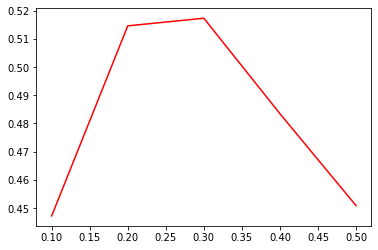

In [14]:
log_reg = LogisticRegression() 
log_reg.fit(x_bow_train, y_train)#training in the training set 
pred = log_reg.predict_proba(x_bow_valid) # predicting on the validation set
possible_split_prob=[0.1,0.2,0.3,0.4,0.5]
scores=[]
for i in possible_split_prob:
    pred_int = pred[:,1] >= i # if prediction is greater than or equal to i, label= 1 else label= 0 
    pred_int = pred_int.astype(np.int) 
    scores.append(f1_score(y_valid, pred_int))# calculating f1 score for the validation set
plt.plot(possible_split_prob,scores,color="red")

In [18]:
#the maximum f-1 score occurs at probability:
scores.index(max(scores))

2

In [19]:
#we see maximum occurs at probability of 0.3,therefore,we build our model with splitting at p=0.3
pred_int=pred[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 label= 1 else label= 0 
pred_int = pred_int.astype(np.int) 
score=f1_score(y_valid, pred_int)# calculating f1 score for the validation set
print("THE F-1 SCORE ON VALIDATION SET IS:",score)

THE F-1 SCORE ON VALIDATION SET IS: 0.5172704296545914


So,we see our model has a score of 0.517 .We test our model on the test set and create a output.txt file

In [22]:
test_pred = log_reg.predict_proba(df_bow_test) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
tweet_test['label'] = test_pred_int #creating a new column with the predictions by our model
result_logistic = tweet_test[['id','label']] #concatenating both id column and label column 
result_logistic.to_csv('result_logistic.csv', index=False) # writing result_logistic a df to .csv file

### MODEL:1.2- LOGISTIC REGRESSION-ON TF-IDF
We use the same model,but now the features given by TF-IDF.

In [25]:
df_tfidf_train = df_tfidf[:31962,:] 
df_tfidf_test = df_tfidf[31962:,:] 
x_tfidf_train = df_tfidf_train[y_train.index] 
x_tfidf_valid = df_tfidf_train[y_valid.index]
log_reg.fit(x_tfidf_train, y_train) 
pred = log_reg.predict_proba(x_tfidf_valid)
pred_int = pred[:,1] >= 0.3 
pred_int = pred_int.astype(np.int) 
score=f1_score(y_valid, pred_int) # calculating f1 score for the validation set
print("THE F-1 SCORE ON VALIDATION SET IS:",score)

THE F-1 SCORE ON VALIDATION SET IS: 0.518716577540107


### MODEL:1.3 LOGISTIC REGRESSION- ON W2V Features

In [29]:
df_w2v_train = df_w2vec.iloc[:31962,:] 
df_w2v_test = df_w2vec.iloc[31962:,:] 
x_w2v_train = df_w2v_train.iloc[y_train.index,:] 
x_w2v_valid = df_w2v_train.iloc[y_valid.index,:]
log_reg.fit(x_w2v_train, y_train) 
pred = log_reg.predict_proba(x_w2v_valid) 
pred_int = pred[:,1] >= 0.3 
pred_int = pred_int.astype(np.int) 
score=f1_score(y_valid, pred_int)
print("THE F-1 SCORE ON VALIDATION SET IS:",score)

THE F-1 SCORE ON VALIDATION SET IS: 0.62407132243685


### MODEL:1.4 LOGISTIC REGRESSION-ON D2V FEATURES

In [32]:
df_d2v_train = df_d2vec.iloc[:31962,:] 
df_d2v_test = df_d2vec.iloc[31962:,:] 
x_d2v_train = df_d2v_train.iloc[y_train.index,:] 
x_d2v_valid = df_d2v_train.iloc[y_valid.index,:]
log_reg.fit(x_d2v_train, y_train) 
pred = log_reg.predict_proba(x_d2v_valid) 
pred_int = pred[:,1] >= 0.3 
pred_int = pred_int.astype(np.int) 
score=f1_score(y_valid, pred_int)
print("THE F-1 SCORE ON VALIDATION SET IS:",score)

THE F-1 SCORE ON VALIDATION SET IS: 0.3623693379790941


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### OBSERVATIONS:
We observe that logistic regression works the worst on doc to vector features .Logistic regression gave the best score so far for model on a word to vector features.Let us apply other classification algorithms to see if a algorithm performs any betterr

### MODEL 2.1: SVM-ON BAG OF WORDS FEATURES 
SVM is the master of all classification algorithms,it is quite powerful and works both on linear and non-linear decision boundaries.The idea of SVM is that to produce a decision boundary that minimizes the miscalssification and keeping the margin as wide as possible.Ofcourse there is a trade-off but we choose a model that produces the optimal decision boundary.The controlling hyper-parameter is C.when C is small,the margins are wide ans so are the misclassifications.When C is large,the margins are narrow and missclassifiaction is reduced.But choosing a very high C would result in overfitting.If model overfits,we should try to reduce C and see what happens to the CV error

Thus we see that the best model was chosen by grid-search method at C=.Now let us use this C value to build our model and test it on our validaion set.We will see if the model performs any better than logistic regression

In [53]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(x_bow_train, y_train)
pred = svc.predict_proba(x_bow_valid) 
pred_int = pred[:,1] >= 0.3 
pred_int = pred_int.astype(np.int) 
score=f1_score(y_valid, pred_int)
print("THE F-1 SCORE ON VALIDATION SET IS:",score)

THE F-1 SCORE ON VALIDATION SET IS: 0.4850746268656716


### MODEL:2.2 SVM-ON TF-IDF FEATURES

In [55]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(x_tfidf_train, y_train) 
pred = svc.predict_proba(x_tfidf_valid) 
pred_int = pred[:,1] >= 0.3 
pred_int = pred_int.astype(np.int) 
score=f1_score(y_valid, pred_int)
print("THE F-1 SCORE ON VALIDATION SET IS:",score)

THE F-1 SCORE ON VALIDATION SET IS: 0.4855275443510737


### MODEL:2.3 SVM-ON W2V FEATURES:

In [56]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(x_w2v_train, y_train) 
pred = svc.predict_proba(x_w2v_valid) 
pred_int = pred[:,1] >= 0.3 
pred_int = pred_int.astype(np.int) 
score=f1_score(y_valid, pred_int)
print("THE F-1 SCORE ON VALIDATION SET IS:",score)

THE F-1 SCORE ON VALIDATION SET IS: 0.6177847113884556


### MODEL:2.4 SVM ON D2V FEATURES

In [57]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(x_d2v_train, y_train) 
pred = svc.predict_proba(x_d2v_valid) 
pred_int = pred[:,1] >= 0.3 
pred_int = pred_int.astype(np.int) 
score=f1_score(y_valid, pred_int)
print("THE F-1 SCORE ON VALIDATION SET IS:",score)

THE F-1 SCORE ON VALIDATION SET IS: 0.20765027322404372


### OBSERVATIONS:
We see that the SVM model performs best on w2v features and worst on D2v features.Next we explore the next biggest classification algorithm in tree based methods-Random forests

### MODEL:3.1-RANDOM FORESTS ON BAG OF WORDS FEATURES:
Random forest is a ensembling technique.In RF,many decision trees are trained and for a instance,we count the "votes" by each of the trees and consider the class with the highest number of votes.The RF is powerful as both a regression and classification algorithm.Since we are dealing with binary classification,we expect RF to give better results.Let us check RFs performance on all of the features

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf_reg = RandomForestClassifier(n_estimators=200, random_state=11).fit(x_bow_train, y_train) 
pred = rf_reg.predict(x_bow_valid) 
score = f1_score(y_valid, pred)
print("THE F-1 SCORE ON VALIDATION SET IS:",score)

THE F-1 SCORE ON VALIDATION SET IS: 0.5274900398406374


### MODEL:3.2 RANDOM FOREST ON TF-IDF FEATURES:

In [59]:
rf_reg = RandomForestClassifier(n_estimators=200, random_state=11).fit(x_tfidf_train, y_train) 
pred = rf_reg.predict(x_tfidf_valid) 
score = f1_score(y_valid, pred)
print("THE F-1 SCORE ON VALIDATION SET IS:",score)

THE F-1 SCORE ON VALIDATION SET IS: 0.5329619312906221


### MODEL:3.3 RANDOM FOREST ON W2V FEATURES:

In [60]:
rf_reg = RandomForestClassifier(n_estimators=200, random_state=11).fit(x_w2v_train, y_train) 
pred = rf_reg.predict(x_w2v_valid) 
score = f1_score(y_valid, pred)
print("THE F-1 SCORE ON VALIDATION SET IS:",score)

THE F-1 SCORE ON VALIDATION SET IS: 0.5096359743040685


### MODEL:3.4 RANDOM FOREST ON D2V FEATURES:

In [61]:
rf_reg = RandomForestClassifier(n_estimators=200, random_state=11).fit(x_d2v_train, y_train) 
pred = rf_reg.predict(x_d2v_valid) 
score = f1_score(y_valid, pred)
print("THE F-1 SCORE ON VALIDATION SET IS:",score)

THE F-1 SCORE ON VALIDATION SET IS: 0.04005722460658083


### OBSERVATIONS:
We see that the random forest classifier works the best on TFIDF features and worst on D2V features(So bad,even worse than all previous algorithhms).Next,we will look at a very powerful algortihm called Xgboost.

### MODEL:4.1 XGBOOST -ON BAG OF WORDS FEATURES
Extreme gradient boosting is not a model initself perse.But the way it trains a model for finsing the parameter is super fast.It runs a advanced implementation of the Gradient-Boosting algorithm.The ability to do parallel computation on a single machine makes it extremely fast.There are many parameters which need to be controlled to optimize the model.We can use grid-search inorder tofind the best paramters.It helps to choose a coarser grid-points first,get a idea of how the algorithm performs rather than trying to fine-grid search in one-go.This will make it very slow.

In [65]:
import xgboost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(x_bow_train, y_train) 
pred = xgb_model.predict(x_bow_valid) 
score=f1_score(y_valid, pred)
print("THE F-1 SCORE ON VALIDATION SET IS:",score)

THE F-1 SCORE ON VALIDATION SET IS: 0.49387370405278036


### MODEL:4.2 XGBOOST-ON TFIDF FEATURES

In [66]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(x_tfidf_train, y_train) 
pred = xgb_model.predict(x_tfidf_valid) 
score=f1_score(y_valid, pred)
print("THE F-1 SCORE ON VALIDATION SET IS:",score)

THE F-1 SCORE ON VALIDATION SET IS: 0.5273722627737226


### MODEL:4.3 XGBOOST-ON W2V FEATURES

In [67]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(x_w2v_train, y_train) 
pred = xgb_model.predict(x_w2v_valid) 
score=f1_score(y_valid, pred)
print("THE F-1 SCORE ON VALIDATION SET IS:",score)

THE F-1 SCORE ON VALIDATION SET IS: 0.6500888099467141


### MODEL:4.4 XGBOOST-ON D2V FEATURES

In [ ]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(x_d2v_train, y_train) 
pred = xgb_model.predict(x_d2v_valid) 
score=f1_score(y_valid, pred)
print("THE F-1 SCORE ON VALIDATION SET IS:",score)

![CBOW](FUNNY.png)

### OBSERVATIONS:
The best score so far was given by XGboost on W2V features.So let us try to fine-tune the parameters of them model and see if we could do better

### FINE-TUNING XGBOOST : ON W2V FEATURES
We will consider tuning the following paramters of the model.Since the number of paramters are large we will first try to grid-search on a coarser grid-point rather than trying to grid-search on fine points.In the search of getting the best model right away,we might be compromising with speed heavily.
- learning rate $\alpha$.Since we see that the algortihm is converging to its min,we will fasten it up by choosing higher step-lengths
- Tune tree-specific parameters such as max_depth, min_child_weight, subsample, colsample_bytree keeping the learning rate fixed.
- Finally tune gamma to avoid overfitting.

In [85]:
import xgboost as xgb
dtrain = xgb.DMatrix(x_w2v_train, label=y_train) 
dvalid = xgb.DMatrix(x_w2v_valid, label=y_valid) 
dtest = xgb.DMatrix(df_w2v_test)
params = {'objective':'binary:logistic','max_depth':6,'min_child_weight': 1,'eta':.3,'subsample': 1,'colsample_bytree': 1}

def my_eval(preds,dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

#STEP:TUNING max_depth and min_child_weight
gs_params = [(max_depth, min_child_weight) for max_depth in range(6,10)for min_child_weight in range(5,8)]
max_f1 = 0. # initializing with 0 
best_params = None 
for max_depth, min_child_weight in gs_params:
    print("CV with max_depth={}, min_child_weight={}".format(max_depth,min_child_weight))
     # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
     # Cross-validation
    cv_results = xgb.cv(params,dtrain,feval= my_eval,num_boost_round=200,maximize=True,seed=16,nfold=5,early_stopping_rounds=10)   
    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].idxmax()    
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))    
    if (mean_f1 > max_f1):
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with max_depth=6, min_child_weight=5
	F1 Score 0.694623 for 67 rounds
CV with max_depth=6, min_child_weight=6
	F1 Score 0.6873895999999999 for 65 rounds
CV with max_depth=6, min_child_weight=7
	F1 Score 0.6839700000000001 for 67 rounds
CV with max_depth=7, min_child_weight=5
	F1 Score 0.6651663999999999 for 36 rounds
CV with max_depth=7, min_child_weight=6
	F1 Score 0.6781406000000001 for 73 rounds
CV with max_depth=7, min_child_weight=7
	F1 Score 0.6720198 for 59 rounds
CV with max_depth=8, min_child_weight=5
	F1 Score 0.684168 for 64 rounds
CV with max_depth=8, min_child_weight=6
	F1 Score 0.6814734 for 59 rounds
CV with max_depth=8, min_child_weight=7
	F1 Score 0.6851565999999999 for 107 rounds
CV with max_depth=9, min_child_weight=5
	F1 Score 0.6615286 for 26 rounds
CV with max_depth=9, min_child_weight=6
	F1 Score 0.6825964 for 66 rounds
CV with max_depth=9, min_child_weight=7
	F1 Score 0.6801936 for 59 rounds
Best params: 6, 5, F1 Score: 0.694623


In [91]:
#Updating max_depth and min_child_weight parameters.
import warnings
warnings.filterwarnings("ignore")
params['max_depth'] = 6 
params['min_child_weight'] = 5
#Tuning subsample 
gridsearch_params = [(subsample)for subsample in [i/10. for i in range(5,10)]]
max_f1 = 0. 
best_params = None 
for subsample in gridsearch_params:
    print("CV with subsample={}".format(subsample))
     # Update our parameters
    params['subsample'] = subsample
    cv_results = xgb.cv(params,dtrain,feval= my_eval,num_boost_round=200,maximize=True,seed=16,nfold=5,early_stopping_rounds=10)
    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].idxmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample) 

CV with subsample=0.5
[22:24:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample, colsample_b } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:24:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample, colsample_b } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:24:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample, colsample_b } might not be used.

  This may not be

	F1 Score 0.6869368 for 131 rounds
CV with subsample=0.9
[22:36:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample, colsample_b } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:36:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample, colsample_b } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:36:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample, colsample_b } mi

TypeError: 'float' object is not subscriptable

In [95]:
print("Best params: {}, F1 Score: {}".format( best_params ,max_f1))

Best params: 0.5, F1 Score: 0.6938967999999999


In [96]:
#Updating subsample and colsample_bytree
params['subsample'] = .5
params['colsample_b'] = .5
max_f1 = 0. 
best_params = None 
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
     # Update ETA
    params['eta'] = eta
    # Run CV
    cv_results = xgb.cv(params,dtrain,feval= my_eval,num_boost_round=1000,maximize=True,seed=16,nfold=5,early_stopping_rounds=20)
    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].idxmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if (mean_f1 > max_f1):
        max_f1 = mean_f1
        best_params = eta 
print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with eta=0.3
[22:57:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample, colsample_b } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:57:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample, colsample_b } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:57:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample, colsample_b } might not be used.

  This may not be accur

[23:08:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample, colsample_b } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:08:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample, colsample_b } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:08:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample, colsample_b } might not be used.

  This may not be accurate due to some 

### BEST XGBOOT MODEL HAS:
- colsample=0.5
- colsample_bytree: 0.5
- eta=0.1
- max_depth = 6
- min_child_weight: 5
- subsample=0.5

In [97]:
params['eta'] = .1
params = {'colsample': 0.9,'colsample_bytree': 0.5, 'eta': 0.1,'max_depth': 6, 'min_child_weight': 5,'objective': 'binary:logistic','subsample': 0.5}
xgb_model = xgb.train(params,dtrain,feval= my_eval,num_boost_round= 1000,maximize=True,evals=[(dvalid, "Validation")],early_stopping_rounds=10)

[23:09:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Validation-error:0.06414	Validation-f1_score:0.13317
Multiple eval metrics have been passed: 'Validation-f1_score' will be used for early stopping.

Will train until Validation-f1_score hasn't improved in 10 rounds.
[1]	Validation-error:0.05694	Validation-f1_score:0.13317
[2]	Validation-error:0.05569	Validation-f1_score:0.13317
[3]	Validation-error:0.05600	Validation-f1_score:0.13317
[4]	Validation-error:0.05631	Validation-f1_score:0.13319
[5]	Validation-error:0.05496	Validation-f1_score:0.36743
[6]	Validation-error:0.05517	Validation-f1_score:0.46133
[7]	Validation-error:0.05444	Validation-f1_score:0.

### FINAL SUBMISSION FILE

In [101]:
test_pred = xgb_model.predict(dtest) 
tweet_test['label'] = (test_pred >= 0.3).astype(np.int) 
TWITTER_FINAL = tweet_test[['id','label']] 
TWITTER_FINAL.to_csv('TWITTER_FINAL.csv', index=False)

## RESULTS AND FINDINGS:
So we have performed four different classification models on our dataset and the resulting F-1 scores were observed.We see that the best-forming model was extreme gradient boost.And we went onto perform parmater tuning on XGBoost and obtained a best validation score of 0.60442.